In [3]:
import numpy as np
import matplotlib.pyplot as plt
from rellm.logit_tracker import LogitTracker

# Logit analysis

This notebook loads in the logits tracked during a completion with rellm. It used gpt2 as the model, so it's not an amazing generation.

The prompt was:

```
My name is Jerome Swannack, I work at coolcompany.com and my email address is 
```

And the regex was:
```re
[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z0-9]
```

In [4]:
# load in data
raw_data = LogitTracker.parse_file("../outputs/tracker_script_result.json")
all_logits = np.array([step.logits_raw for step in raw_data.steps])

In [5]:
# Calculate the sum of the probabilities for the allowed tokens

def softmax(x: np.array) -> np.array:
    return np.exp(x) / np.sum(np.exp(x))


token_probs = [
    sum(softmax(all_logits[i, :])[raw_data.steps[i].allowed_ids])
    for i in range(all_logits.shape[0])
]

Text(0, 0.5, 'probability sum of available tokens')

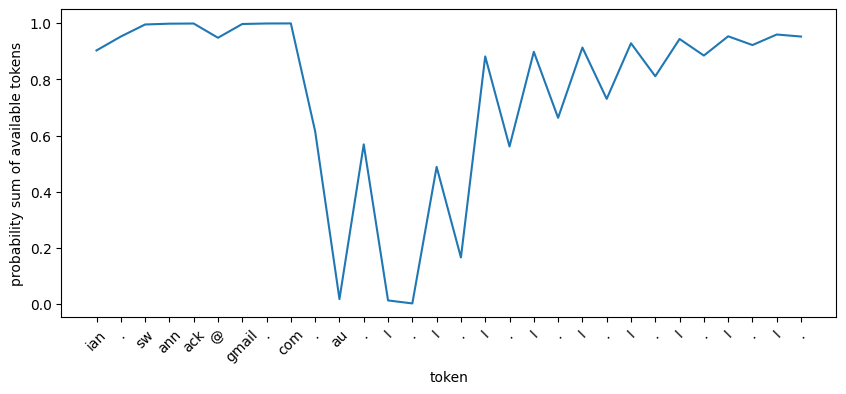

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

# plot the probabilities of allowed tokens at each step in the generation
ax.plot(token_probs)


# set x ticks to every 1 token
ax.set_xticks(np.arange(0, len(token_probs), 1.0))

# set x labels to be the tokens
tokens = raw_data.result_tokens

ax.set_xticklabels(tokens, rotation=45)
ax.set_xlabel("token")
ax.set_ylabel("probability sum of available tokens")